# ePSproc demo

## Basic IO

In [1]:
import sys
import os
import numpy as np

# For module testing, include path to module here
modPath = r'D:\code\github\ePSproc'
sys.path.append(modPath)
import epsproc as ep

* pyevtk not found, VTK export not available. 


In [2]:
# Load data from modPath\data
dataPath = os.path.join(modPath, 'data')

# Scan data dir
dataSet = ep.readMatEle(fileBase = dataPath)  

*** ePSproc readMatEle(): scanning files for DumpIdy segments (matrix elements)

*** Scanning dir
D:\code\github\ePSproc\data
Found 2 .out file(s)


*** Reading ePS output file:  D:\code\github\ePSproc\data\n2_3sg_0.1-50.1eV_A2.inp.out
Expecting 51 energy points.
Expecting 2 symmetries.
Expecting 102 dumpIdy segments.
Found 102 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 102 sets of matrix elements (0 blank)

*** Reading ePS output file:  D:\code\github\ePSproc\data\no2_demo_ePS.out
Expecting 1 energy points.
Expecting 3 symmetries.
Expecting 3 dumpIdy segments.
Found 3 dumpIdy segments (sets of matrix elements).

Processing segments to Xarrays...
Processed 3 sets of matrix elements (0 blank)


### Structure

Data is read and sorted into [Xarrays](http://xarray.pydata.org/en/stable/index.html), currently one Xarray per input file. The full dimensionality is maintained here.

Calling the array will provide some output...

In [3]:
dataSet[1]

<xarray.DataArray 'no2_demo_ePS.out' (LM: 110, Eke: 1, Sym: 3, mu: 3, it: 1, Type: 2)>
array([[[[[[      nan     +nanj,       nan     +nanj]],

          ...,

          [[      nan     +nanj,       nan     +nanj]]],


         ...,


         [[[-0.006893+0.212752j, -0.002009+0.126392j]],

          ...,

          [[-0.006893+0.212752j, -0.002009+0.126392j]]]]],




       ...,




       [[[[[      nan     +nanj,       nan     +nanj]],

          ...,

          [[      nan     +nanj,       nan     +nanj]]],


         ...,


         [[[      nan     +nanj,       nan     +nanj]],

          ...,

          [[      nan     +nanj,       nan     +nanj]]]]]])
Coordinates:
  * LM       (LM) MultiIndex
  - l        (LM) int64 1 1 2 2 2 2 3 3 3 3 3 ... 10 10 10 10 10 10 10 10 10 10
  - m        (LM) int64 -1 1 -2 -1 1 2 -3 -2 -1 1 2 ... -1 1 2 3 4 5 6 7 8 9 10
  * mu       (mu) int64 -1 0 1
  * it       (it) int64 1
  * Type     (Type) object 'L' 'V'
  * Eke      (Eke) float64 0.81
  * Sy

## Basic plotting

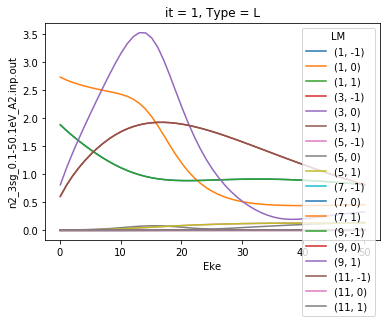

In [4]:
# Plot matrix elements using Xarray functionality
daPlot = dataSet[0].sum('mu').sum('Sym').sel({'Type':'L'}).squeeze()
daPlot.pipe(np.abs).plot.line(x='Eke')

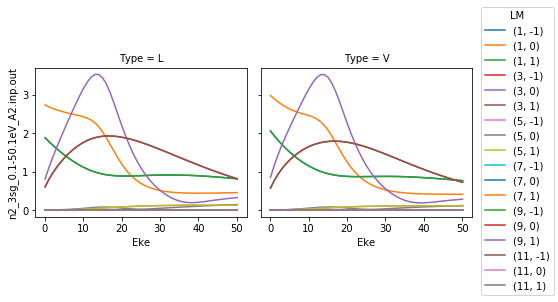

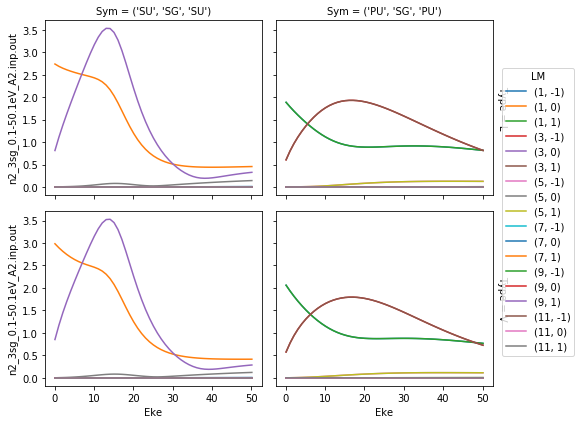

In [5]:
# Plot with faceting on type
daPlot = dataSet[0].sum('mu').sum('Sym').squeeze()
daPlot.pipe(np.abs).plot.line(x='Eke', col='Type')

# Plot with faceting on symmetry
daPlot = dataSet[0].sum('mu').squeeze()
daPlot.pipe(np.abs).plot.line(x='Eke', col='Sym', row='Type')

## Calculate MFPADs

Calculate MFPADs, as given by:

\begin{equation}
I_{\mu_{0}}(\theta_{\hat{k}},\phi_{\hat{k}},\theta_{\hat{n}},\phi_{\hat{n}})=\frac{4\pi^{2}E}{cg_{p_{i}}}\sum_{\mu_{i},\mu_{f}}|T_{\mu_{0}}^{p_{i}\mu_{i},p_{f}\mu_{f}}(\theta_{\hat{k}},\phi_{\hat{k}},\theta_{\hat{n}},\phi_{\hat{n}})|^{2}\label{eq:MFPAD}
\end{equation}

\begin{equation}
T_{\mu_{0}}^{p_{i}\mu_{i},p_{f}\mu_{f}}(\theta_{\hat{k}},\phi_{\hat{k}},\theta_{\hat{n}},\phi_{\hat{n}})=\sum_{l,m,\mu}I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)Y_{lm}^{*}(\theta_{\hat{k}},\phi_{\hat{k}})D_{\mu,\mu_{0}}^{1}(R_{\hat{n}})\label{eq:TMF}
\end{equation}

\begin{equation}
I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)=\langle\Psi_{i}^{p_{i},\mu_{i}}|\hat{d_{\mu}}|\Psi_{f}^{p_{f},\mu_{f}}\varphi_{klm}^{(-)}\rangle\label{eq:I}
\end{equation}

In this formalism:

- $I_{l,m,\mu}^{p_{i}\mu_{i},p_{f}\mu_{f}}(E)$ is the radial part of
the dipole matrix element, determined from the initial and final state
electronic wavefunctions $\Psi_{i}^{p_{i},\mu_{i}}$and $\Psi_{f}^{p_{f},\mu_{f}}$,
photoelectron wavefunction $\varphi_{klm}^{(-)}$ and dipole operator
$\hat{d_{\mu}}$. Here the wavefunctions are indexed by irreducible
representation (i.e. symmetry) by the labels $p_{i}$ and $p_{f}$,
with components $\mu_{i}$ and $\mu_{f}$ respectively; $l,m$ are
angular momentum components, $\mu$ is the projection of the polarization
into the MF (from a value $\mu_{0}$ in the LF). Each energy and irreducible
representation corresponds to a calculation in ePolyScat.
- $T_{\mu_{0}}^{p_{i}\mu_{i},p_{f}\mu_{f}}(\theta_{\hat{k}},\phi_{\hat{k}},\theta_{\hat{n}},\phi_{\hat{n}})$
is the full matrix element (expanded in polar coordinates) in the
MF, where $\hat{k}$ denotes the direction of the photoelectron $\mathbf{k}$-vector,
and $\hat{n}$ the direction of the polarization vector $\mathbf{n}$
of the ionizing light. Note that the summation over components $\{l,m,\mu\}$
is coherent, and hence phase sensitive.
- $Y_{lm}^{*}(\theta_{\hat{k}},\phi_{\hat{k}})$ is a spherical harmonic.
- $D_{\mu,\mu_{0}}^{1}(R_{\hat{n}})$ is a Wigner rotation matrix element,
with a set of Euler angles $R_{\hat{n}}=(\phi_{\hat{n}},\theta_{\hat{n}},\chi_{\hat{n}})$,
which rotates/projects the polarization into the MF .
- $I_{\mu_{0}}(\theta_{\hat{k}},\phi_{\hat{k}},\theta_{\hat{n}},\phi_{\hat{n}})$
is the final (observable) MFPAD, for a polarization $\mu_{0}$ and
summed over all symmetry components of the initial and final states,
$\mu_{i}$ and $\mu_{f}$. Note that this sum can be expressed as
an incoherent summation, since these components are (by definition)
orthogonal.
- $g_{p_{i}}$ is the degeneracy of the state $p_{i}$.

See: Toffoli, D., Lucchese, R. R., Lebech, M., Houver, J. C., & Dowek, D. (2007). Molecular frame and recoil frame photoelectron angular distributions from dissociative photoionization of NO2. The Journal of Chemical Physics, 126(5), 054307. https://doi.org/10.1063/1.2432124

MFPADs for test NO2 dataset (single energy, (z,x,y) pol states)


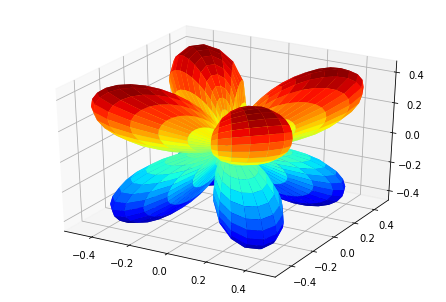

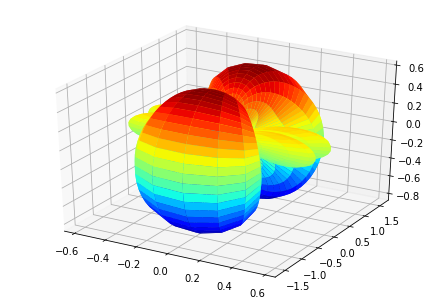

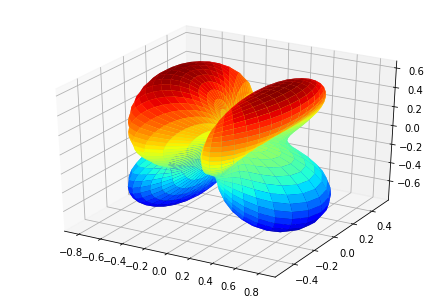

In [6]:
print('MFPADs for test NO2 dataset (single energy, (z,x,y) pol states)')
TX, TlmX = ep.mfpad(dataSet[1])

# Plot for each pol geom (symmetry)
for n in range(0,3):      
    ep.sphSumPlotX(TX[n].sum('Sym').squeeze(), pType = 'a')
    

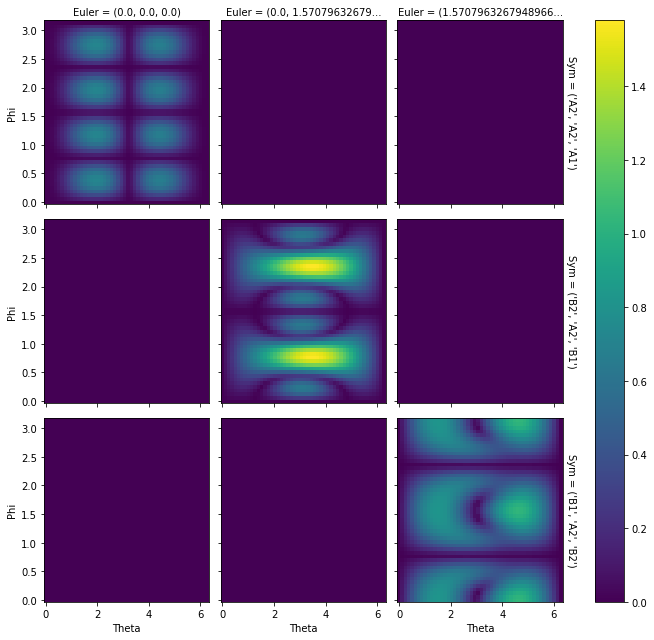

In [7]:
# Plot abs(TX) images using Xarray functionality
TX.squeeze().pipe(np.abs).plot(x='Theta',y='Phi', col='Euler', row='Sym')

N2 test data, MFPADs vs E and (z,x,y) pol geom


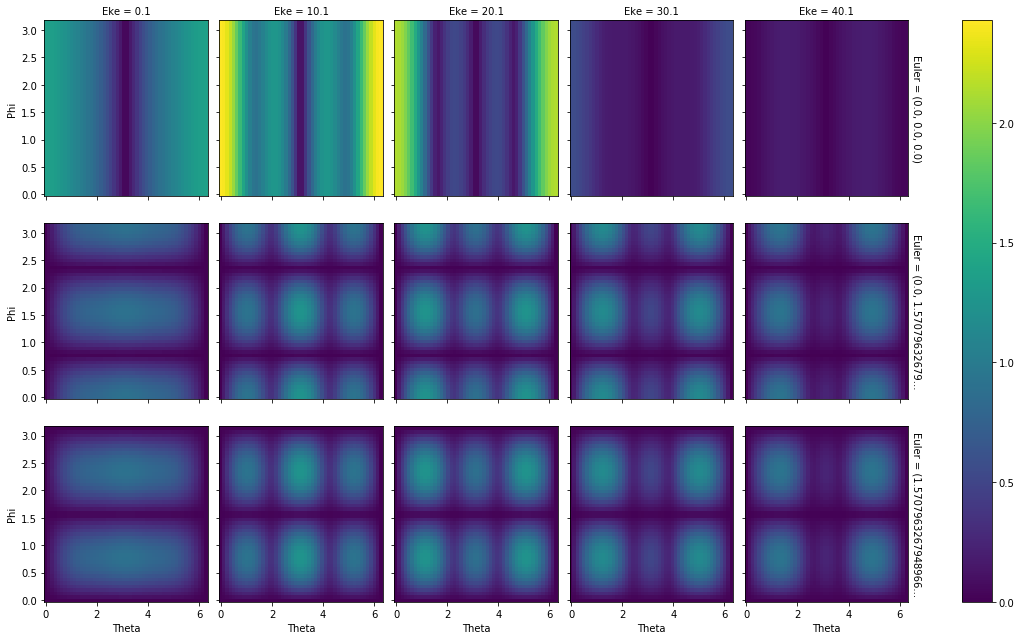

In [8]:
# Plot MFPAD surfaces vs E
print('N2 test data, MFPADs vs E and (z,x,y) pol geom')
TX, TlmX = ep.mfpad(dataSet[0])
TXplot = TX.sum('Sym').squeeze().isel(Eke=slice(0,50,10))
TXplot.pipe(np.abs).plot(x='Theta',y='Phi', row='Euler', col='Eke')